# Compas EDA

### Import libraries and set plotting style

In [2]:
import os
import sys
import glob

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from itertools import product

sys.path.append('../scr')
from analysis import *
from data_preprocessing import *
from plot import *
from utils import *

sns.set_style("darkgrid")


 ### Feature Numbers and Model Types

In [3]:
feature_numbers = ['2', '7', '9']  
model_types = ['LP','RP', 'LB', 'RB' ]  

### Load CSV files

In [4]:
df = load_and_clean_predictions('compas','predictions', feature_numbers, model_types, data_path='../predictions/')

Loaded file: ../predictions/compas_predictions_2LP_1104_2259.csv for model 2LP
Loaded file: ../predictions/compas_predictions_2RP_nodate.csv for model 2RP
Loaded file: ../predictions/compas_predictions_2LB_nodate.csv for model 2LB
Loaded file: ../predictions/compas_predictions_2RB_nodate.csv for model 2RB
Loaded file: ../predictions/compas_predictions_7LP_nodate.csv for model 7LP
Loaded file: ../predictions/compas_predictions_7RP_nodate.csv for model 7RP
Loaded file: ../predictions/compas_predictions_7LB_nodate.csv for model 7LB
Loaded file: ../predictions/compas_predictions_7RB_nodate.csv for model 7RB
Loaded file: ../predictions/compas_predictions_9LP_nodate.csv for model 9LP
Loaded file: ../predictions/compas_predictions_9RP_nodate.csv for model 9RP
Loaded file: ../predictions/compas_predictions_9LB_nodate.csv for model 9LB
Loaded file: ../predictions/compas_predictions_9RB_nodate.csv for model 9RB


### Combine predictions 

In [5]:
combined = {}

for model_type in model_types:
    combined[model_type]  = pd.concat([df['2'][model_type], 
                                      remove_id_column(df['7'][model_type]), 
                                      remove_id_column(df['9'][model_type])], axis=1)

#print(combined['LP'])

### Model Multiplicity

In [6]:
stats = {model_type: {feature_number: {} for feature_number in feature_numbers + ['combined']} for model_type in model_types}

for model_type in model_types:
    for feature_number in feature_numbers:
        stats[model_type][feature_number] = compute_row_stats(df[feature_number][model_type])

for model_type in model_types:
    stats[model_type]['combined'] = compute_row_stats(combined[model_type])

In [7]:
# stats['LP']['combined'] 

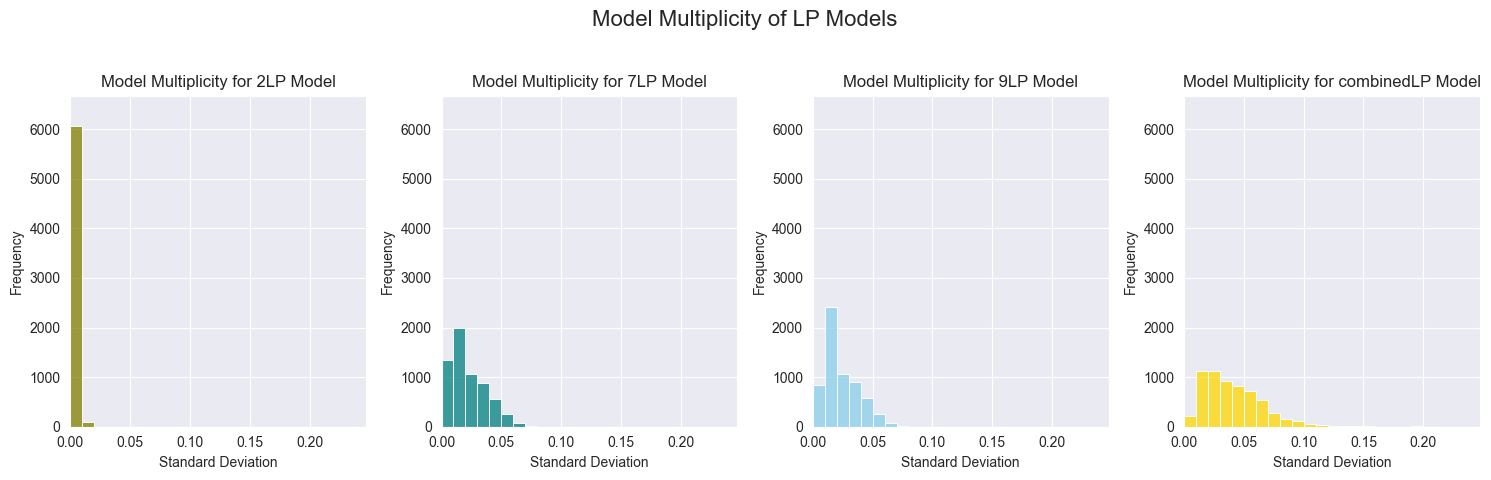

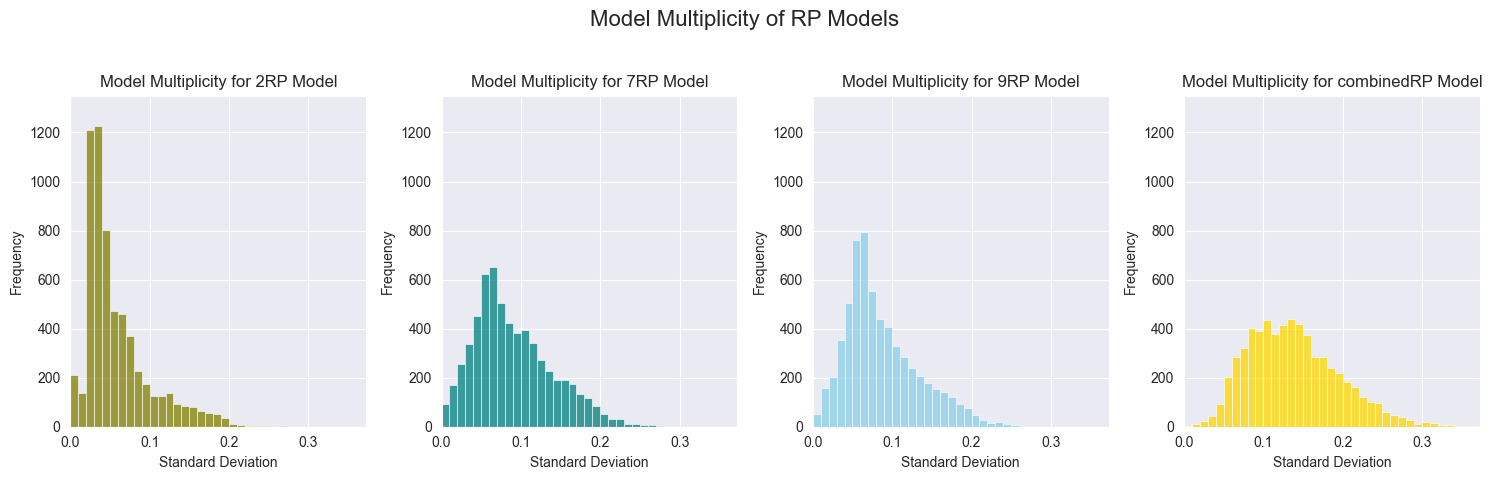

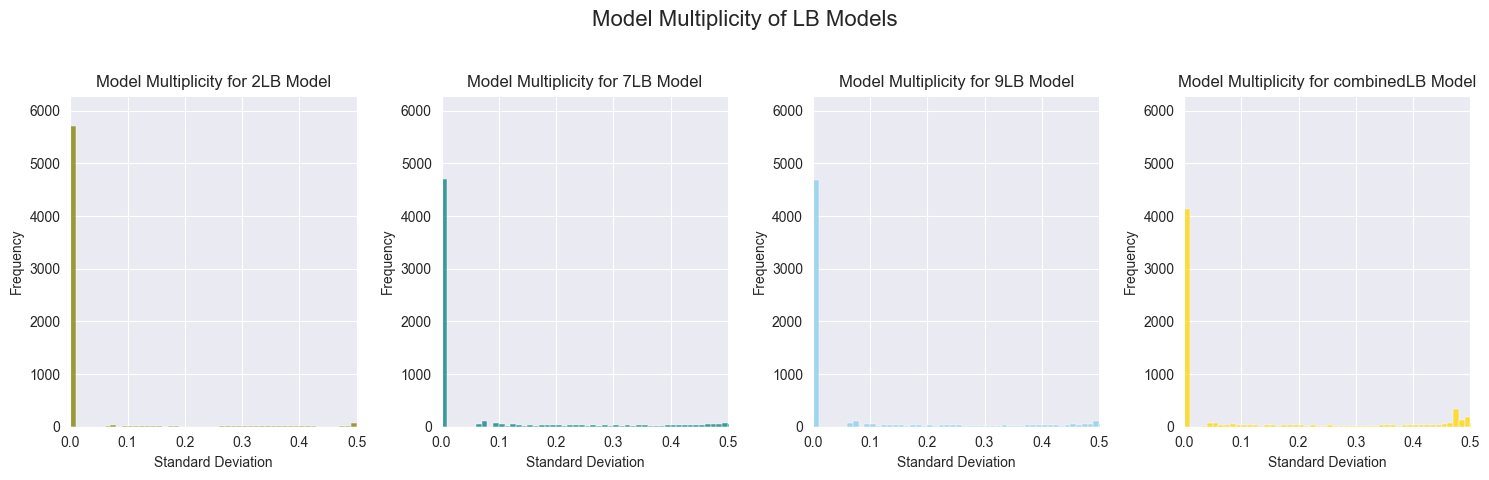

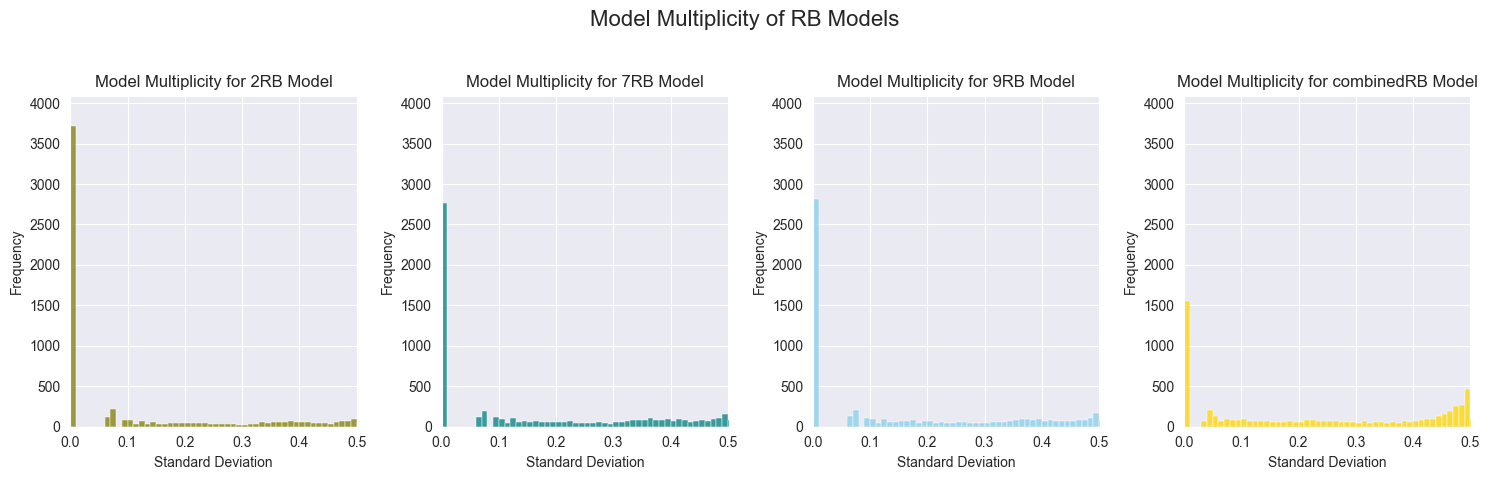

In [8]:
all_std = {}

suffixes = ['2', '7', '9', 'combined'] 

# model multiplicity for each model (i.e. 2LP, 9RP etc.) and for each combined predictions (i.e. combinedLP, combinedRP etc.)
for model_type in model_types:
    std_columns = [stats[model_type][feature_number]['std'] for feature_number in suffixes]
    all_std[model_type] = pd.concat(std_columns, axis=1)
    all_std[model_type].columns = [f'std_{suffix}' for suffix in suffixes]
    plot_all_multiplicity({model_type: all_std[model_type]}, suffixes, colors=['olive', 'teal', 'skyblue', 'gold'])


### Mean Distribution

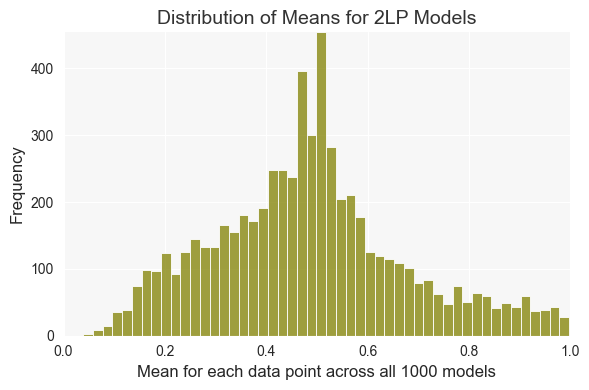

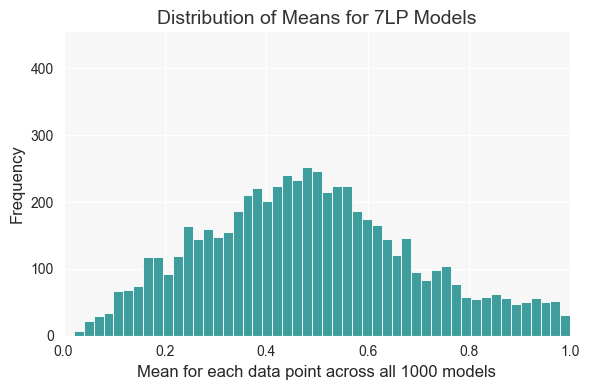

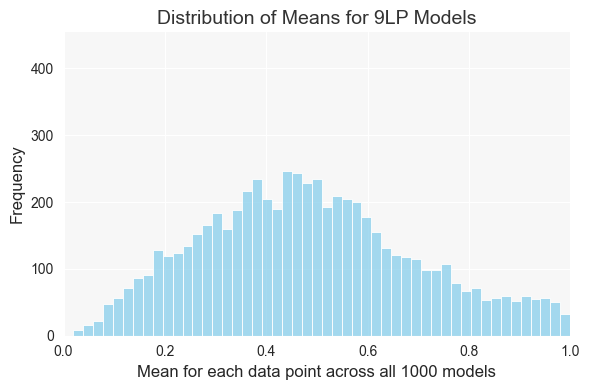

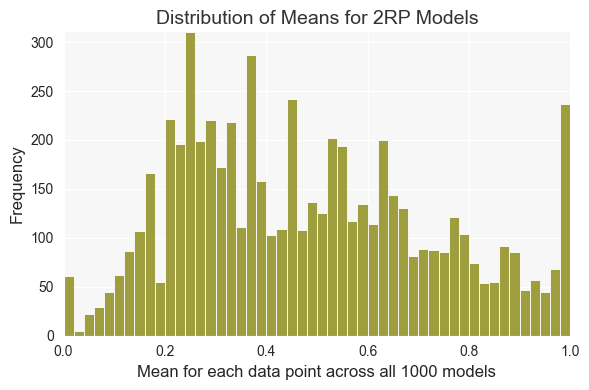

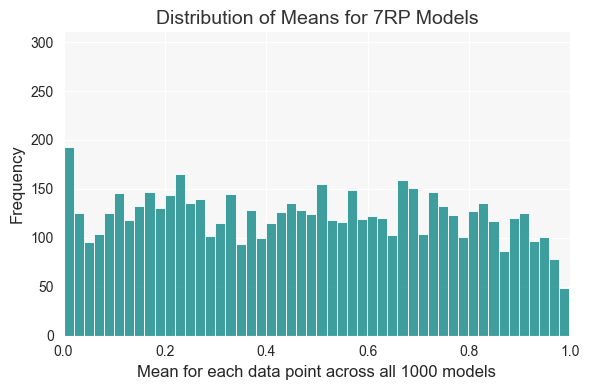

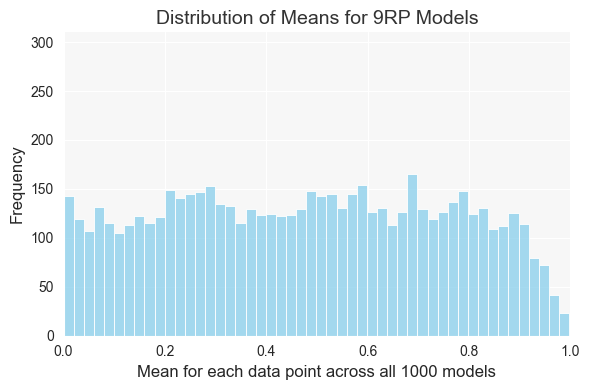

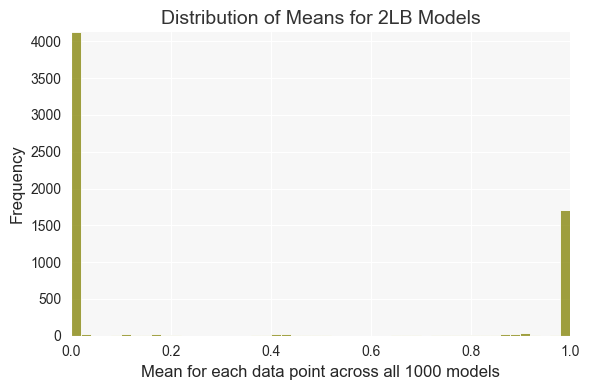

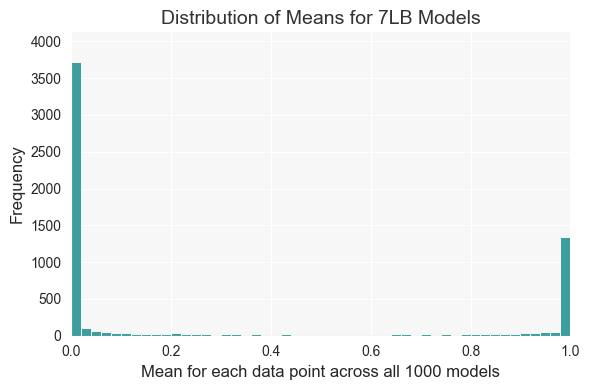

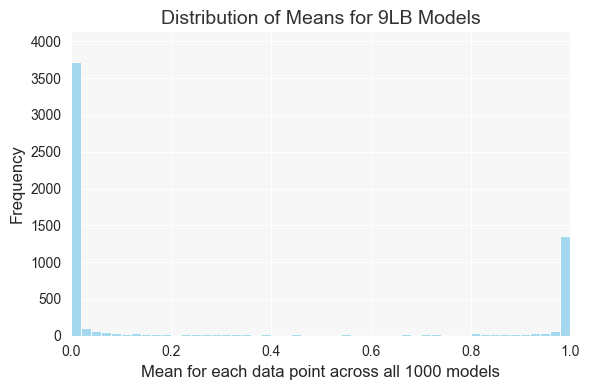

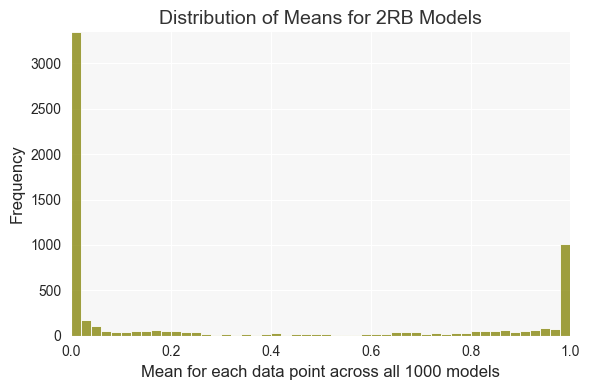

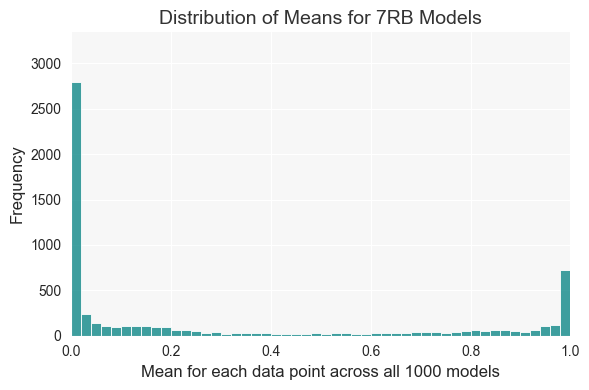

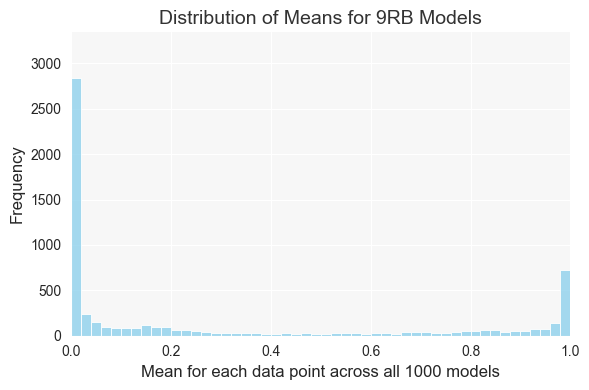

In [9]:
means = {}

# mean distributions
for model_type in model_types:
    mean_columns = [stats[model_type][feature_number]['mean'] for feature_number in feature_numbers]
    means[model_type] = pd.concat(mean_columns, axis=1)
    means[model_type].columns = [f'mean_{suffix}' for suffix in feature_numbers]
    plot_all_mean_distributions(means[model_type], feature_numbers, model_type, colors=['olive', 'teal', 'skyblue'])

#print(combined_mean['LP'])

### Distribution of Mean Differences

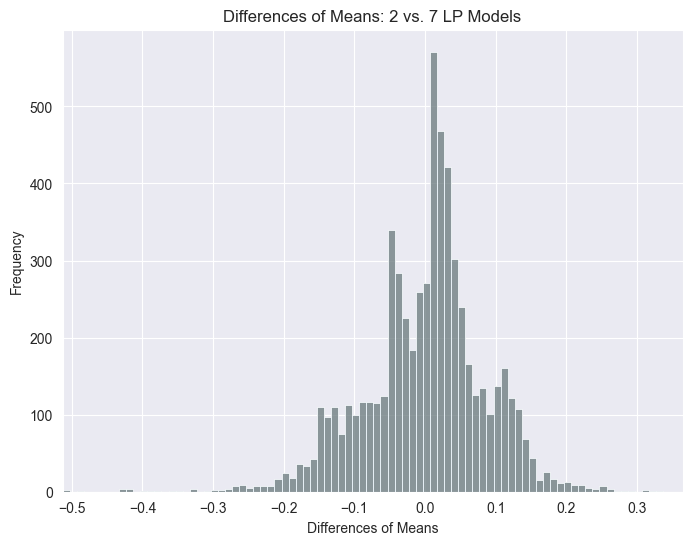

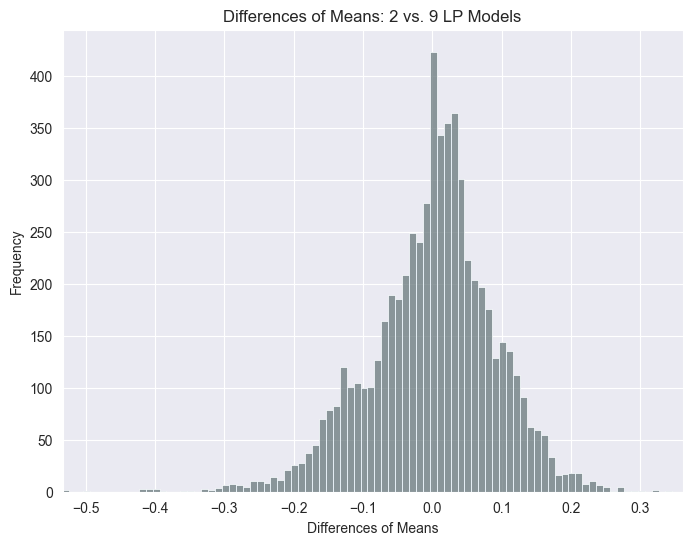

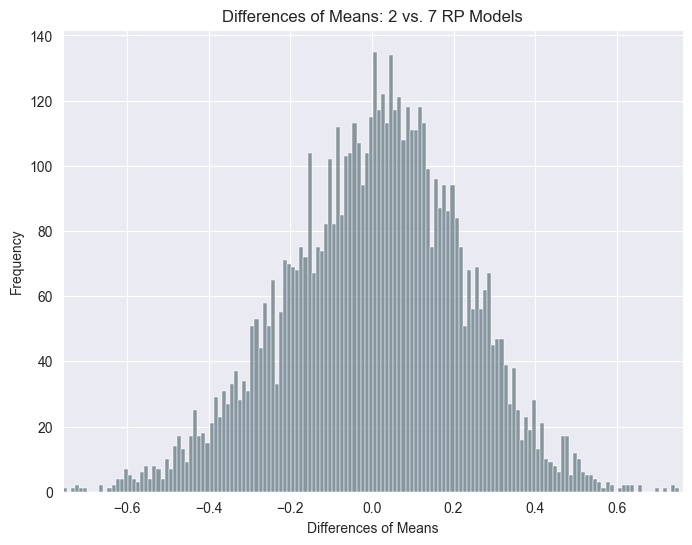

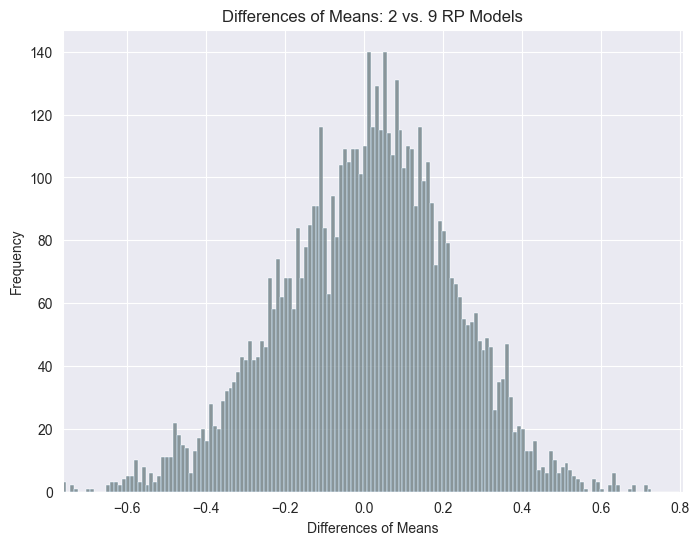

In [10]:
mean_diff = {model_type: {} for model_type in model_types}

# mean differences 
for model_type in model_types:
    mean_diff[model_type]['diff_2vs7'] = compute_mean_differences(means[model_type], 'mean_2', 'mean_7', feature_1='2', feature_2='7')
    mean_diff[model_type]['diff_2vs9'] = compute_mean_differences(means[model_type], 'mean_2', 'mean_9', feature_1='2', feature_2='9')


combined_mean_diff = {model_type: pd.concat([mean_diff[model_type]['diff_2vs7'], mean_diff[model_type]['diff_2vs9']], axis=1) for model_type in model_types}
#print(combined_mean_diff['LP'])
#print(type(combined_mean_diff['LP']))

# distributions of mean differences for each model type
plot_all_differences_histograms(
    mean_diffs=combined_mean_diff, 
    model_types=model_types,
    differences=['diff_2vs7', 'diff_2vs9'],
    plot_description_comp=['2 vs. 7', '2 vs. 9'],
    colors=['olive', 'teal']
)

### Absolute Differences of Means




\begin{align}
\text{Absolute Difference of Means} = \left| \frac{1}{N} \sum_{i=1}^{N} M_i^{F_1, T}(x) - \frac{1}{N} \sum_{i=1}^{N} M_i^{F_2, T}(x)\right|
\text{,} \quad F_1 \neq F_2  \notag

\end{align}



- $M_i^{F_1, T}(x)$ and $ M_i^{F_2, T} (x)$ are the predictions for individual $\mathit{ x }$ from models with feature numbers $F_1$ and $F_2$, and model type T.


In [11]:
abs_mean_diff = {model_type: {} for model_type in model_types}

# mean differences 
for model_type in model_types:
        abs_mean_diff[model_type]['abs_diff_2vs7'] = absolute_mean_differences(means[model_type], 'mean_2', 'mean_7', feature_1='2', feature_2='7')
        abs_mean_diff[model_type]['abs_diff_2vs9'] = absolute_mean_differences(means[model_type], 'mean_2', 'mean_9', feature_1='2', feature_2='9')

combined_abs_mean_diff = {
    model_type: pd.concat([
        abs_mean_diff[model_type]['abs_diff_2vs7'][['abs_diff_2vs7']],
        abs_mean_diff[model_type]['abs_diff_2vs9'][['abs_diff_2vs9']]
    ], axis=1)
    for model_type in model_types
}

#print(combined_abs_mean_diff['LP'])
# print(combined_abs_mean_diff['RP'])
# print(combined_abs_mean_diff['RP'])

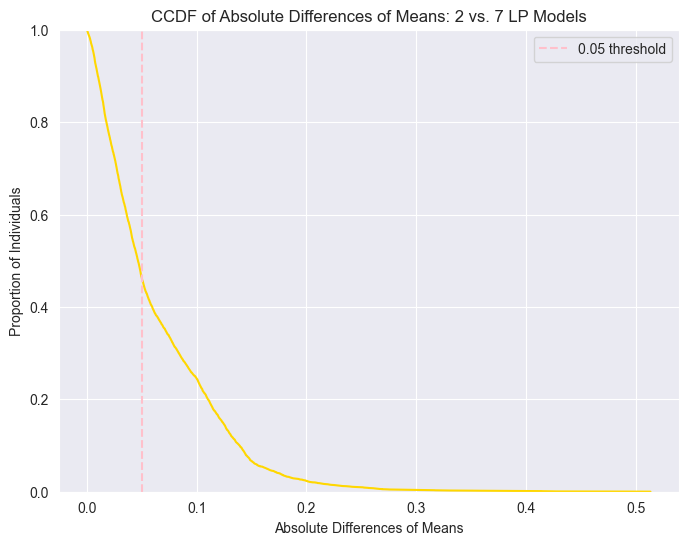

Percentage of points with at least 0.05 absolute difference in means: 46.39%



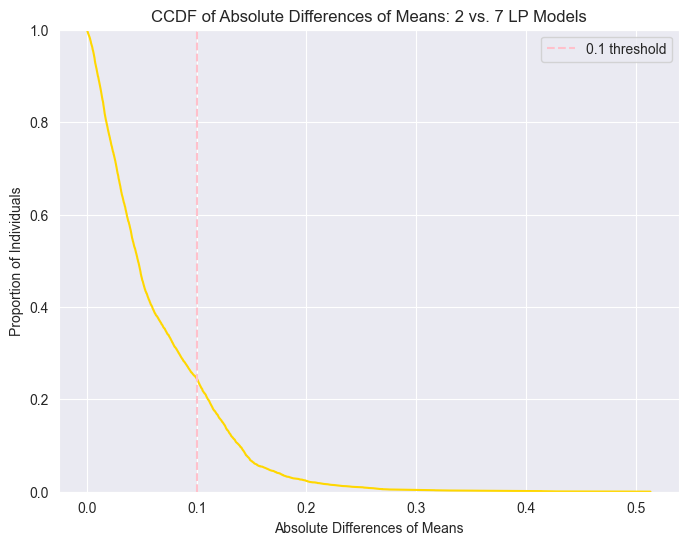

Percentage of points with at least 0.1 absolute difference in means: 24.50%



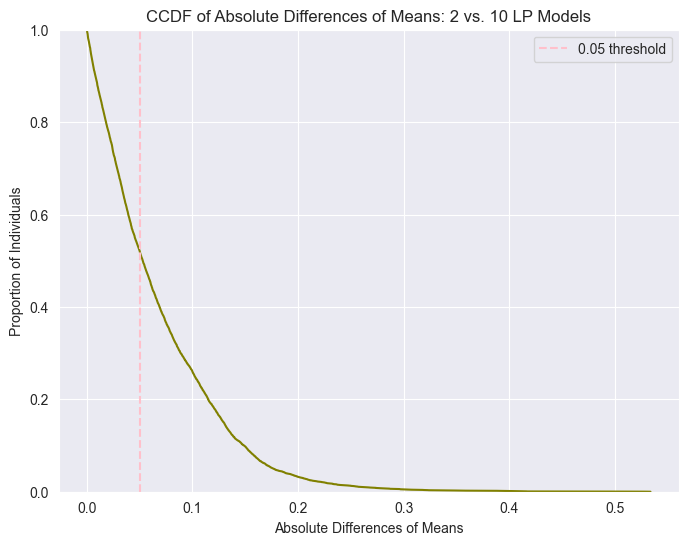

Percentage of points with at least 0.05 absolute difference in means: 52.14%



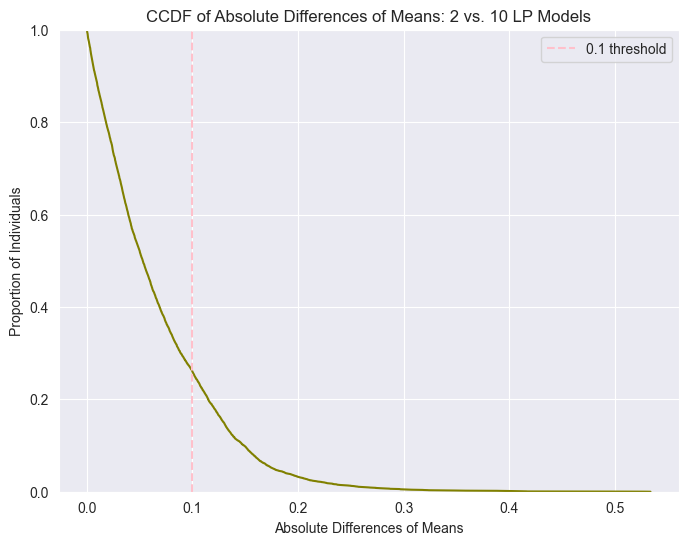

Percentage of points with at least 0.1 absolute difference in means: 26.02%



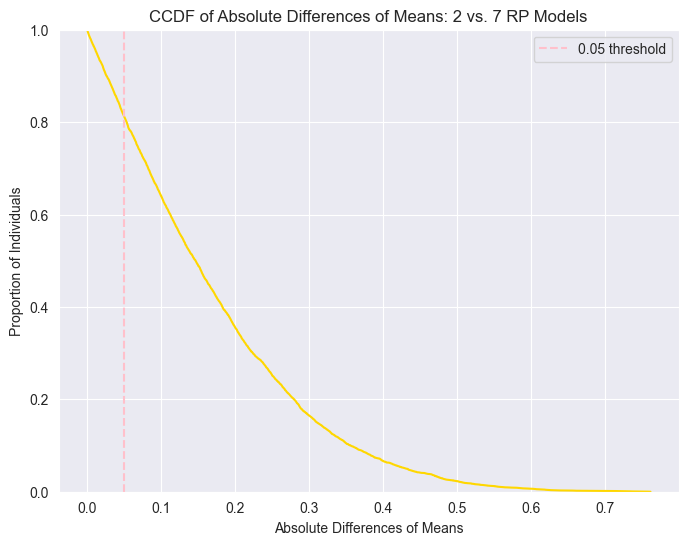

Percentage of points with at least 0.05 absolute difference in means: 81.37%



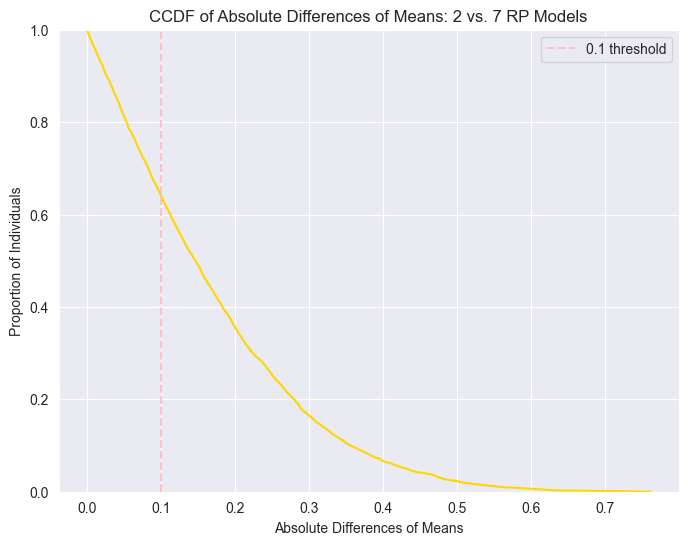

Percentage of points with at least 0.1 absolute difference in means: 64.10%



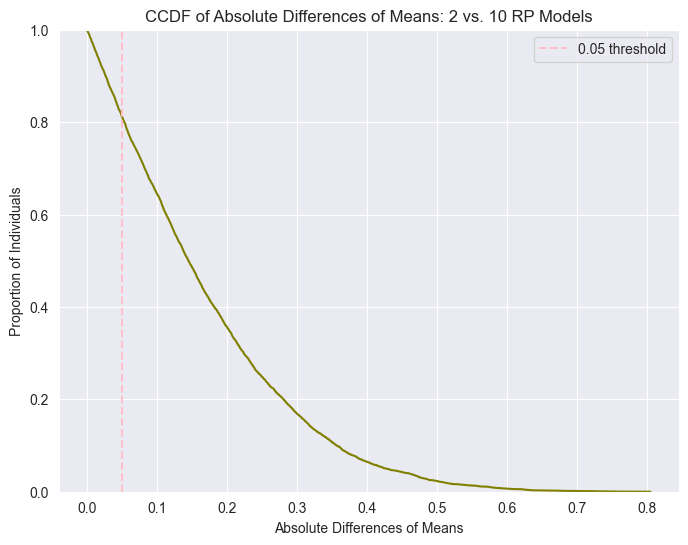

Percentage of points with at least 0.05 absolute difference in means: 81.24%



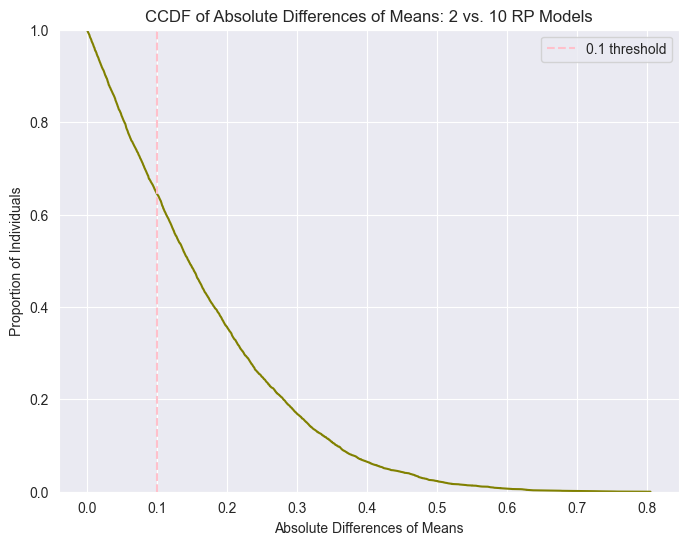

Percentage of points with at least 0.1 absolute difference in means: 64.53%



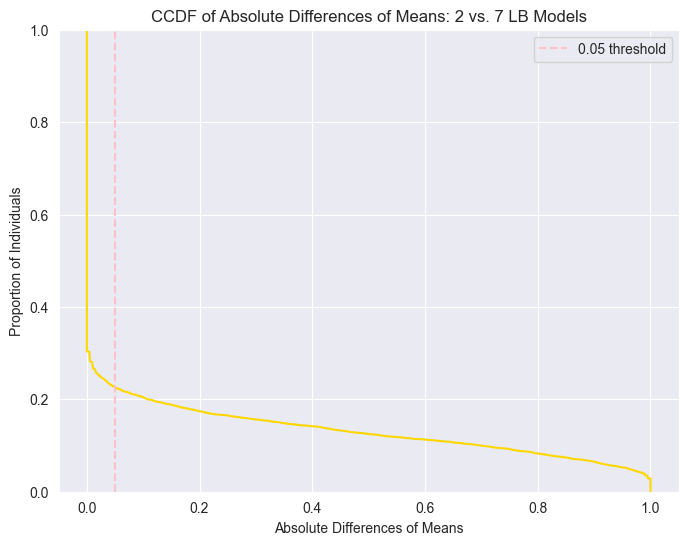

Percentage of points with at least 0.05 absolute difference in means: 22.57%



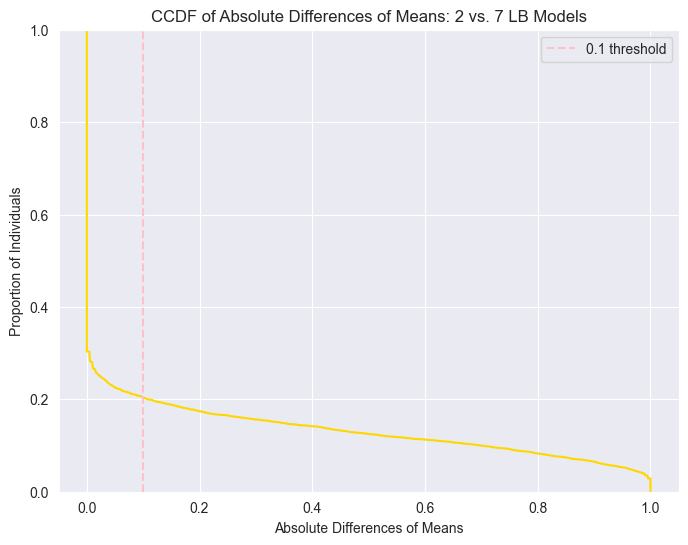

Percentage of points with at least 0.1 absolute difference in means: 20.45%



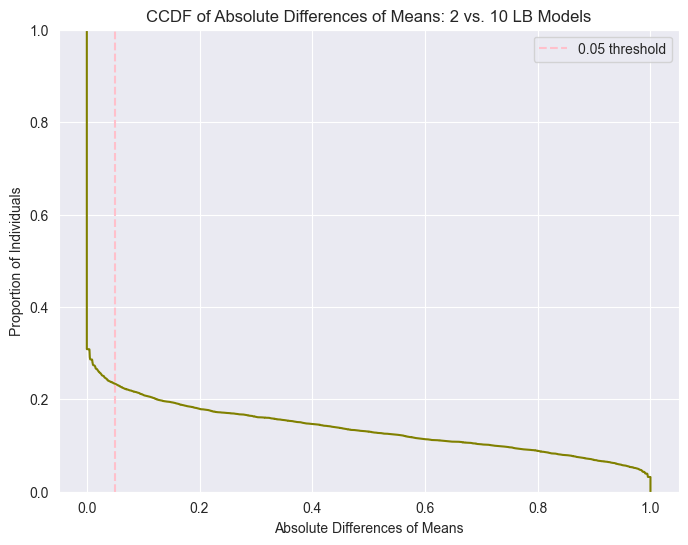

Percentage of points with at least 0.05 absolute difference in means: 23.38%



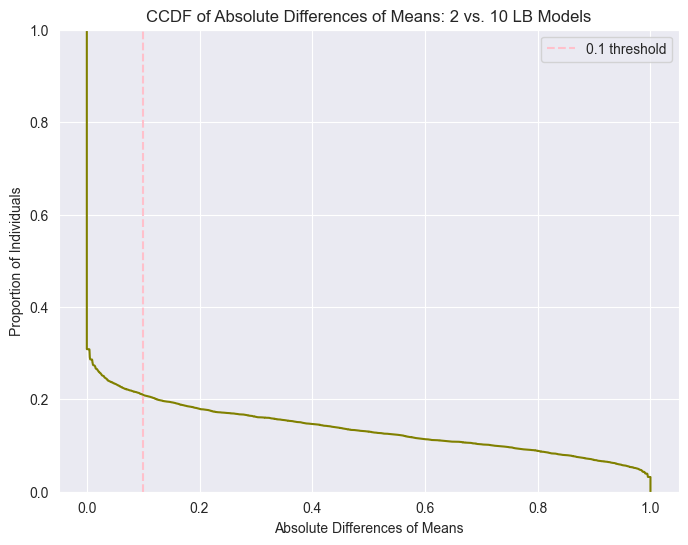

Percentage of points with at least 0.1 absolute difference in means: 20.98%



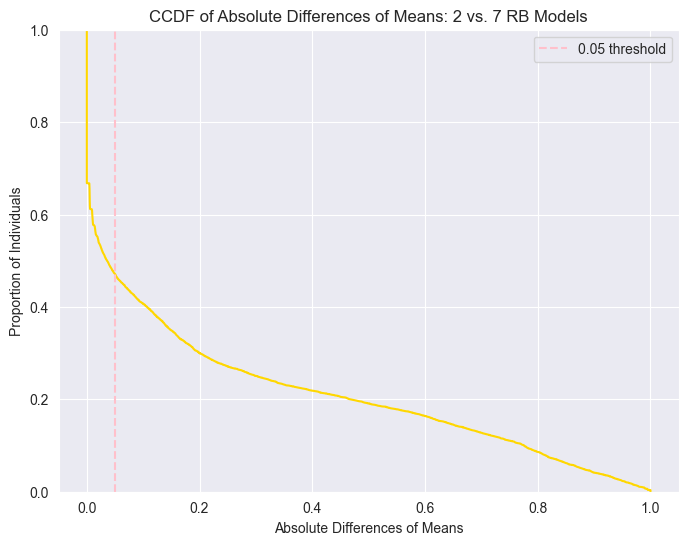

Percentage of points with at least 0.05 absolute difference in means: 47.16%



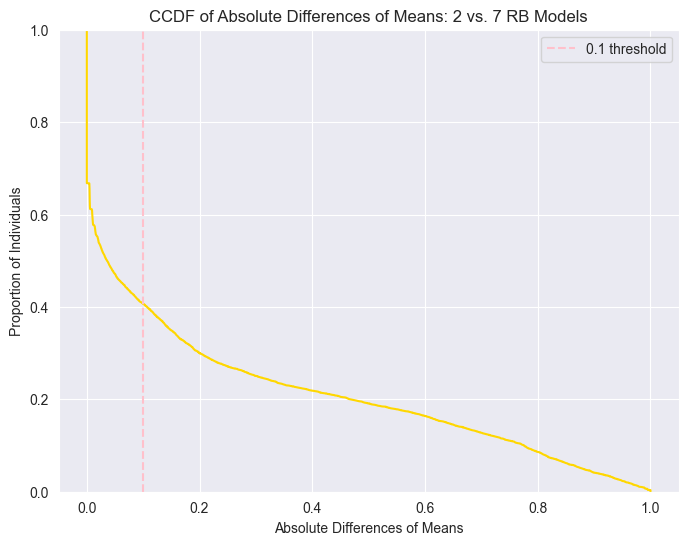

Percentage of points with at least 0.1 absolute difference in means: 40.67%



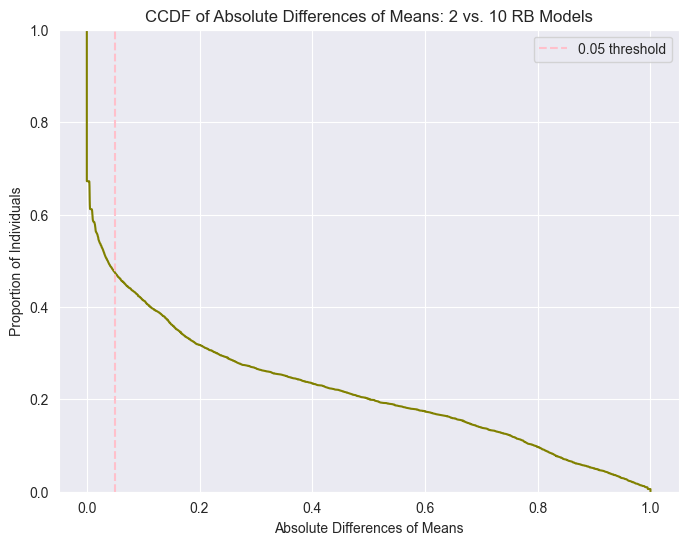

Percentage of points with at least 0.05 absolute difference in means: 47.44%



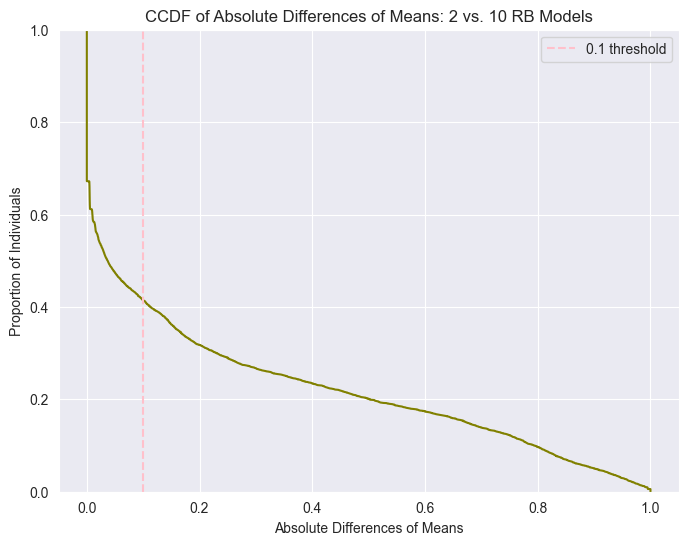

Percentage of points with at least 0.1 absolute difference in means: 41.43%



In [12]:
# CCDF for the absolute mean differences
feature_pairs = [('abs_diff_2vs7', '2 vs. 7'), ('abs_diff_2vs9', '2 vs. 10')]
colors = ['gold', 'olive']  
thresholds = [0.05, 0.1]  
diff_type ="abs_diff_of_means"

color_map = {
    '2 vs. 7': 'gold',
    '2 vs. 10': 'olive'
}

for model_type in model_types:
    combinations = product(feature_pairs, thresholds)

    for feature_pair, threshold in combinations:
        feature, label = feature_pair
        color = color_map.get(label, 'gray')  

        plot_ccdf(
            data=combined_abs_mean_diff[model_type],
            column=feature,
            diff_type=diff_type,
            color=color,
            threshold=threshold,
            feature_pair=label,
            model_type=model_type
        )

### Mean of Absolute Differences

\begin{align}
{\text{Mean of Absolute Differences}} = \frac{1}{N} \sum_{i=1}^{N} \left| M_i^{F_1, T}(x) - M_i^{F_2, T}(x) \right|
\text{,} \quad F_1 \neq F_2  \notag
\end{align}



In [ ]:
mean_of_abs_diff = {model_type: {} for model_type in model_types}

for model_type in model_types:
    mean_of_abs_diff[model_type]['abs_diff_2vs7'] = compute_row_stats(
        compute_absolute_difference(df['2']['LP'], df['7']['LP'], prefix_1='2LM', prefix_2='7LM')
    )['mean']
    mean_of_abs_diff[model_type]['abs_diff_2vs9'] = compute_row_stats(
        compute_absolute_difference(df['2']['LP'], df['9']['LP'], prefix_1='2LM', prefix_2='9LM')
    )['mean']

combined_mean_of_abs_diff = {
    model_type: pd.concat([
        mean_of_abs_diff[model_type]['abs_diff_2vs7'].rename("abs_diff_2vs7"),
        mean_of_abs_diff[model_type]['abs_diff_2vs9'].rename("abs_diff_2vs9")
    ], axis=1)
    for model_type in model_types
}

# print(combined_mean_of_abs_diff['LP'])

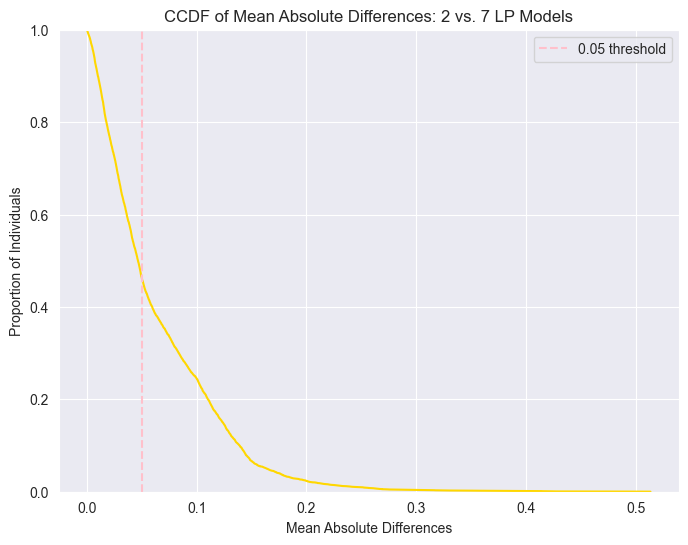

Percentage of points with at least 0.05 absolute difference in means: 46.39%



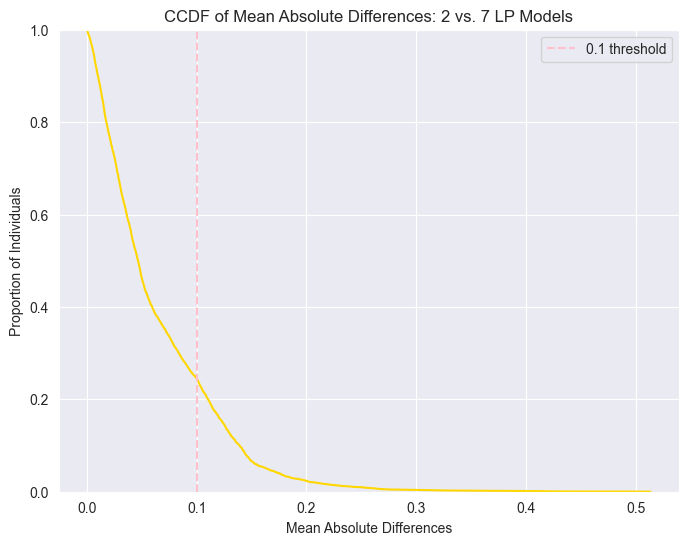

Percentage of points with at least 0.1 absolute difference in means: 24.50%



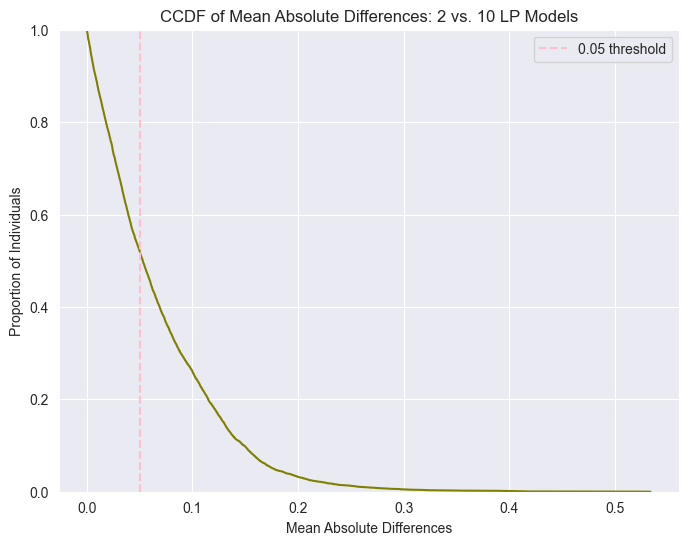

Percentage of points with at least 0.05 absolute difference in means: 52.14%



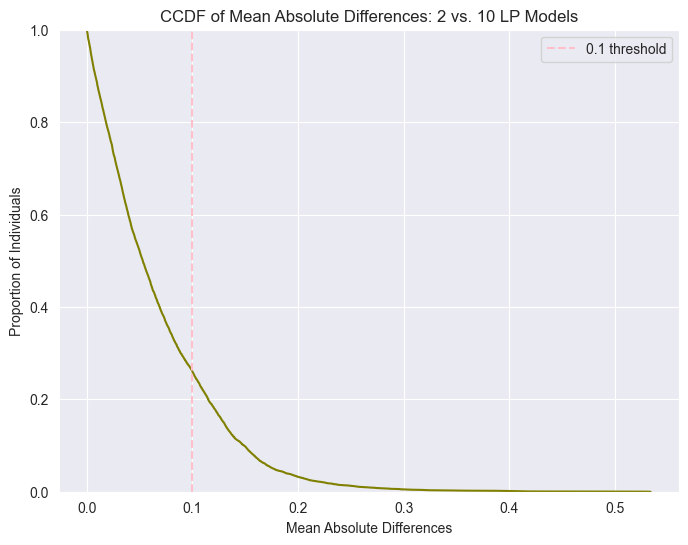

Percentage of points with at least 0.1 absolute difference in means: 26.02%



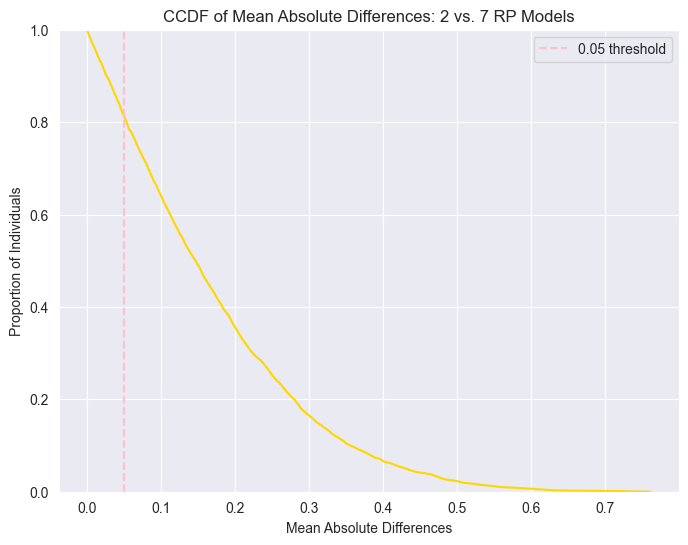

Percentage of points with at least 0.05 absolute difference in means: 81.37%



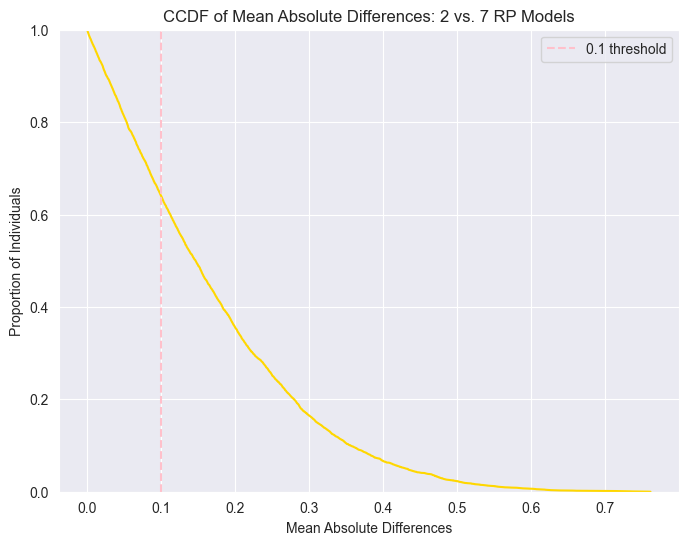

Percentage of points with at least 0.1 absolute difference in means: 64.10%



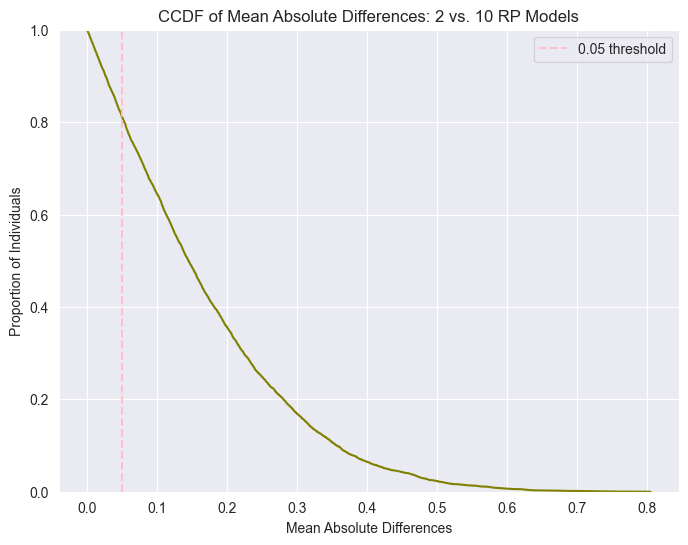

Percentage of points with at least 0.05 absolute difference in means: 81.24%



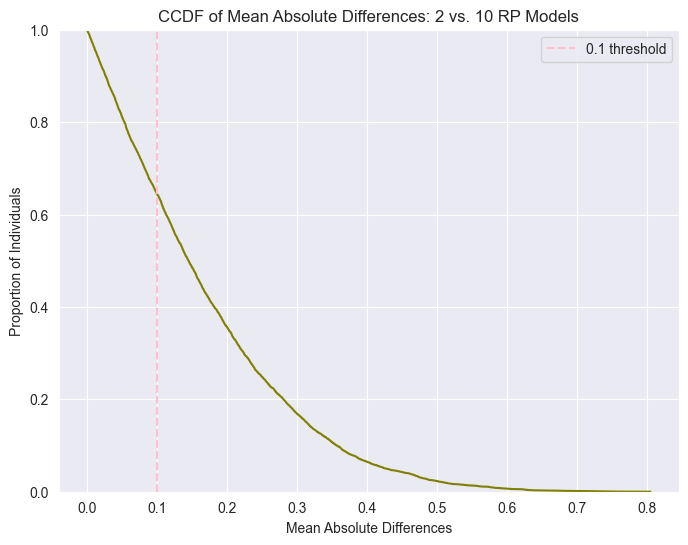

Percentage of points with at least 0.1 absolute difference in means: 64.53%



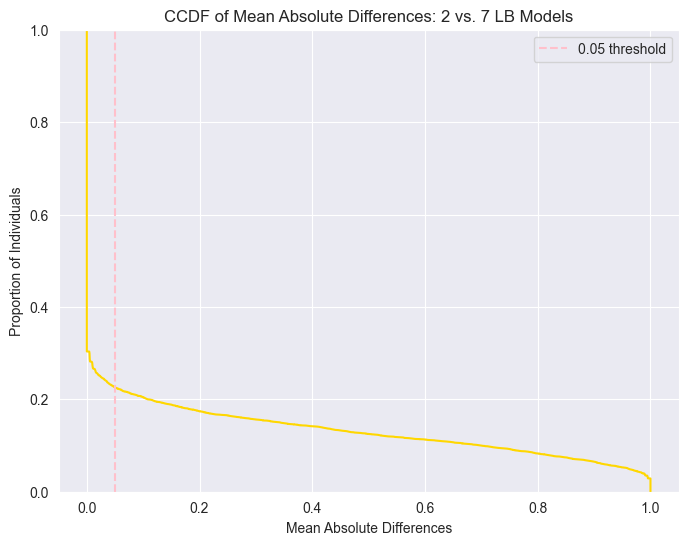

Percentage of points with at least 0.05 absolute difference in means: 22.57%



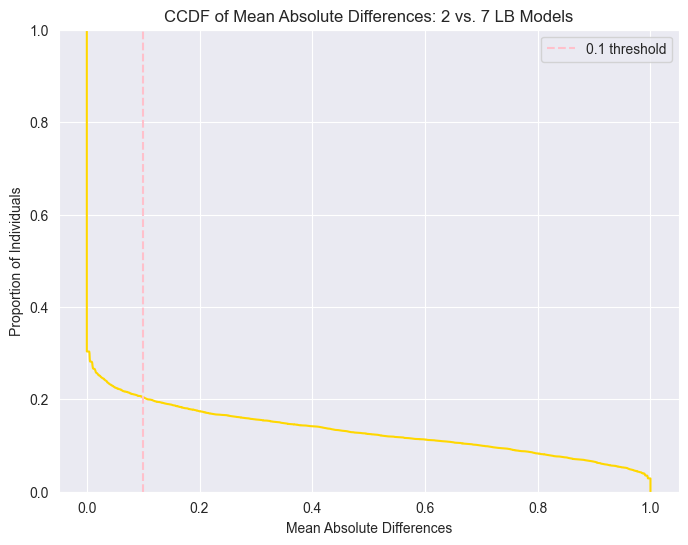

Percentage of points with at least 0.1 absolute difference in means: 20.45%



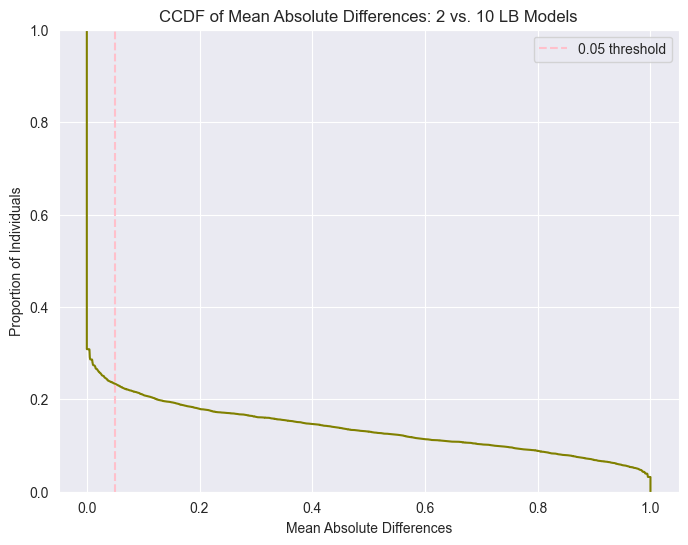

Percentage of points with at least 0.05 absolute difference in means: 23.38%



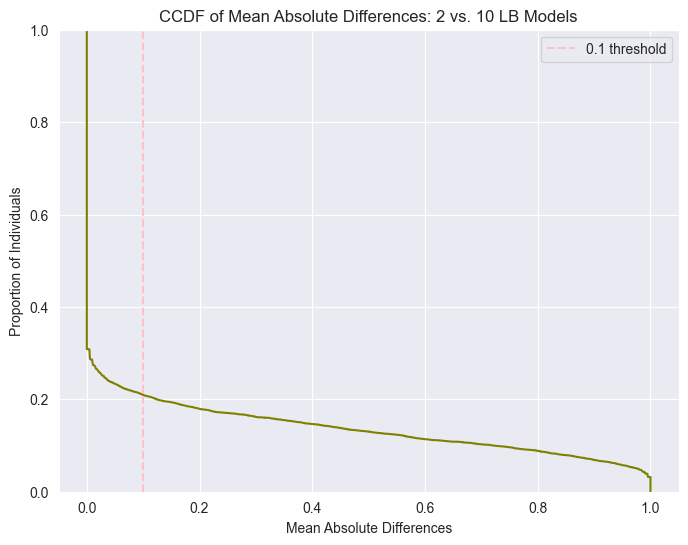

Percentage of points with at least 0.1 absolute difference in means: 20.98%



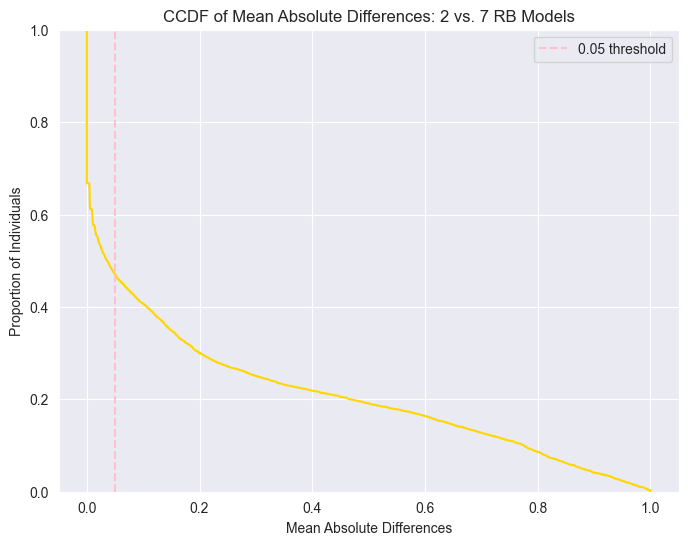

Percentage of points with at least 0.05 absolute difference in means: 47.16%



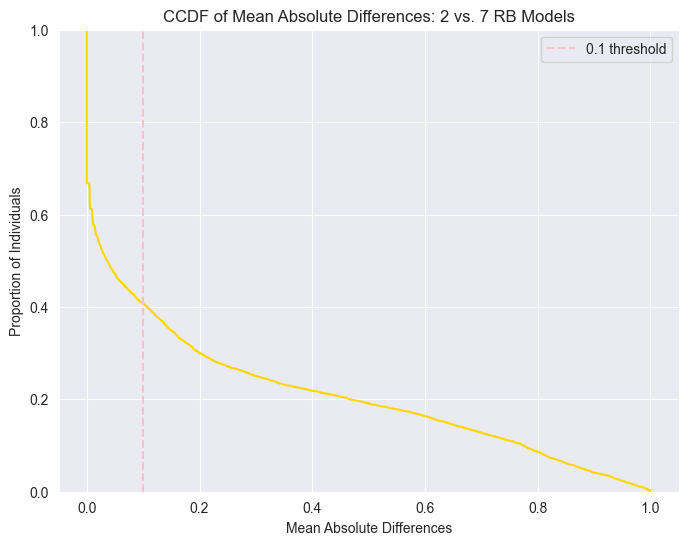

Percentage of points with at least 0.1 absolute difference in means: 40.67%



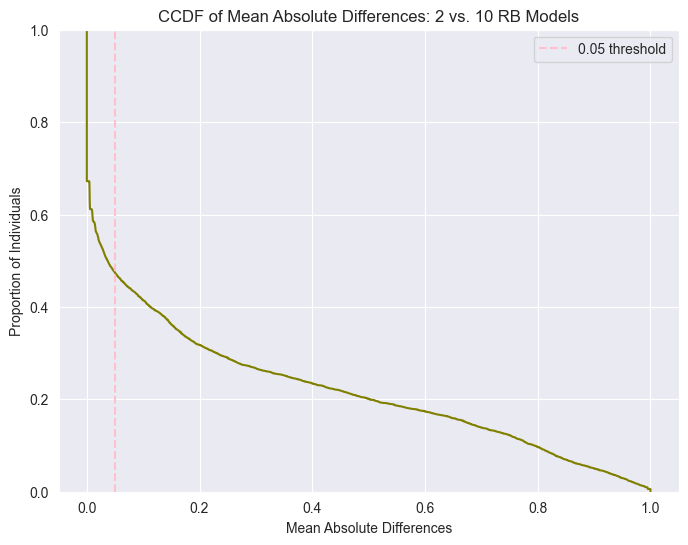

Percentage of points with at least 0.05 absolute difference in means: 47.44%



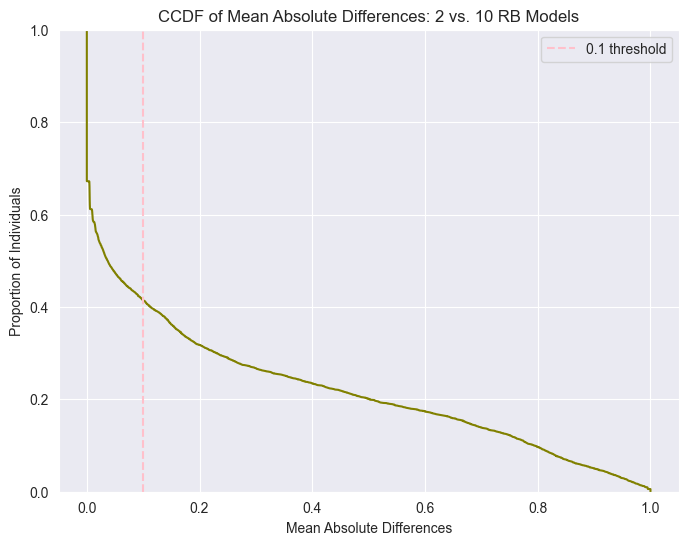

Percentage of points with at least 0.1 absolute difference in means: 41.43%



In [ ]:
# CCDF for the absolute mean differences
feature_pairs = [('abs_diff_2vs7', '2 vs. 7'), ('abs_diff_2vs9', '2 vs. 10')]
colors = ['gold', 'olive']  
thresholds = [0.05, 0.1]  
diff_type ="mean_of_abs_diff"

color_map = {
    '2 vs. 7': 'gold',
    '2 vs. 10': 'olive'
}

for model_type in model_types:
    combinations = product(feature_pairs, thresholds)

    for feature_pair, threshold in combinations:
        feature, label = feature_pair
        color = color_map.get(label, 'gray')  

        plot_ccdf(
            data=combined_abs_mean_diff[model_type],
            column=feature,
            diff_type=diff_type,
            color=color,
            threshold=threshold,
            feature_pair=label,
            model_type=model_type
        )